In [20]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the data
lb_df = pd.read_csv('LB_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [22]:
print(lb_df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [23]:
# Sort data by Team and Year
lb_df = lb_df.sort_values(by=['Team', 'Year'])
print(lb_df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       LB        15.993624        146.484990        28.0   
50   49ers  2020       LB         2.991927        144.514132        34.0   
70   49ers  2021       LB         4.131507        110.101206        26.0   
123  49ers  2022       LB         7.934678         48.812538        33.0   
12   Bears  2019       LB         9.681190        491.560918        35.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     63.131934     27.90%      0.812500    0.216  ...   
50     73.581955      5.40%      0.375000    0.025  ...   
70     66.076498     19.50%      0.588235    0.081  ...   
123    79.201195     27.60%      0.764706    0.196  ...   
12     64.207627     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                        48.207362                        268.502249   
50                        39.768498       

In [24]:
team_data = lb_df.groupby('Team')

In [25]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][[
                                        'Previous_batted_passes',
                                        'Previous_tackles_for_loss',
                                        'Previous_hits',
                                        'Previous_pass_break_ups',
                                        'Previous_snap_counts_dl_outside_t',
                                        'Previous_snap_counts_dl',
                                        'Previous_hurries'  # Adjusted for relevance if applicable.
                                        ]]
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [26]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

[[[0.00000000e+00 2.78200409e+00 1.95910020e+00 3.33742331e+00
   3.94928425e+01 3.94928425e+01 3.65930470e+00]
  [4.26222415e-01 2.38727823e+00 1.16616183e+00 3.76070965e+00
   3.27546517e+01 3.27546517e+01 3.88273475e+00]
  [1.48346304e-01 4.55739300e+00 4.27480545e+00 2.23346304e+00
   5.45987354e+01 5.45987354e+01 5.48978599e+00]]

 [[4.92760859e-01 5.21867199e+00 1.04143784e+00 2.30354468e+00
   8.17523714e+00 8.17523714e+00 9.54667998e+00]
  [1.06181456e-01 2.76271186e+00 1.04835494e+00 1.33649053e+00
   1.28499501e+01 1.28499501e+01 5.57826520e+00]
  [0.00000000e+00 9.14643043e+00 1.49244398e+00 3.88900469e+00
   9.64252215e+00 9.64252215e+00 5.87389265e+00]]

 [[0.00000000e+00 1.92718823e+00 2.60263362e-01 1.87567777e+00
   3.07257940e+01 3.07257940e+01 2.33772270e+00]
  [6.47763075e-01 2.68809074e+00 1.88909893e+00 1.90989288e+00
   2.69426591e+01 2.69426591e+01 5.62318841e+00]
  [0.00000000e+00 3.77159656e+00 6.41338761e-01 1.45771144e+00
   3.81311624e+01 3.81311624e+01 3.29

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4612.6982 - val_loss: 3906.9705
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4289.5020 - val_loss: 3835.0396
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4163.6055 - val_loss: 3772.5933
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4045.7771 - val_loss: 3707.8108
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4228.3467 - val_loss: 3631.2051


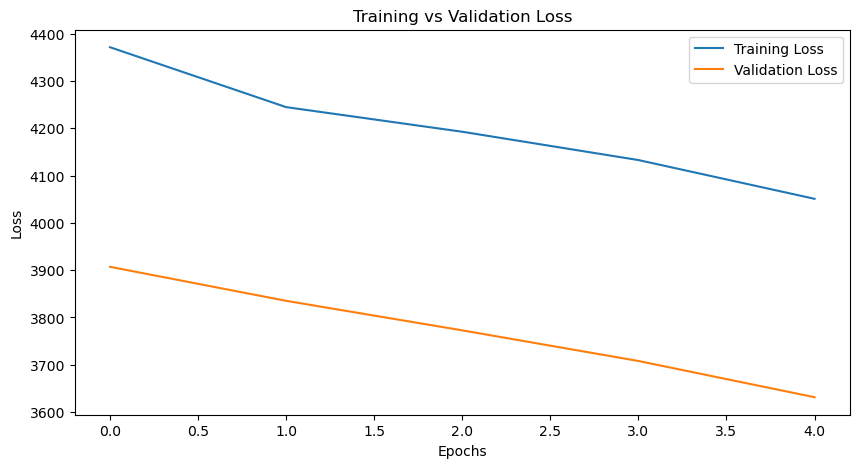

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
R² Score: -53.6553


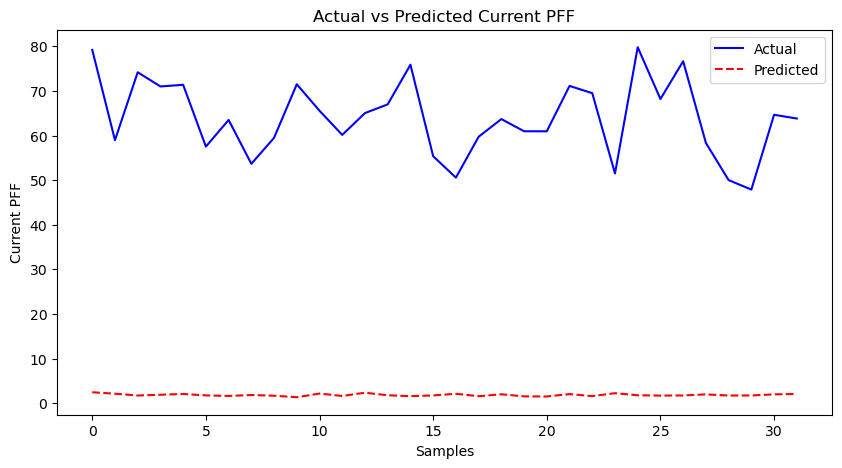

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4136.0474 - val_loss: 3535.0195
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3787.0269 - val_loss: 3419.5720
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3712.4949 - val_loss: 3287.2163
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3536.1118 - val_loss: 3124.4136
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3553.6655 - val_loss: 2930.3323
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3172.8679 - val_loss: 2687.3181
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2795.9182 - val_loss: 2385.1367
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2559.8486 - val_loss: 2025.4236
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2239.5818 - val_loss: 1618.8567
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1787.1869 - val_loss: 1189.2844


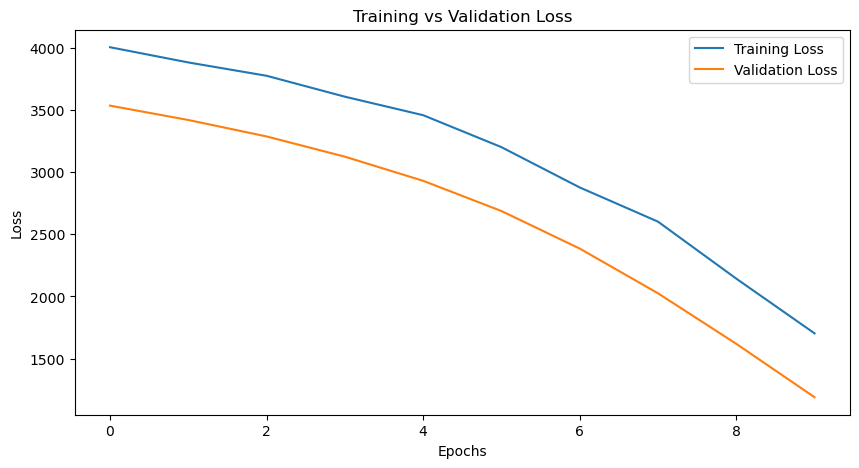

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: -17.7309


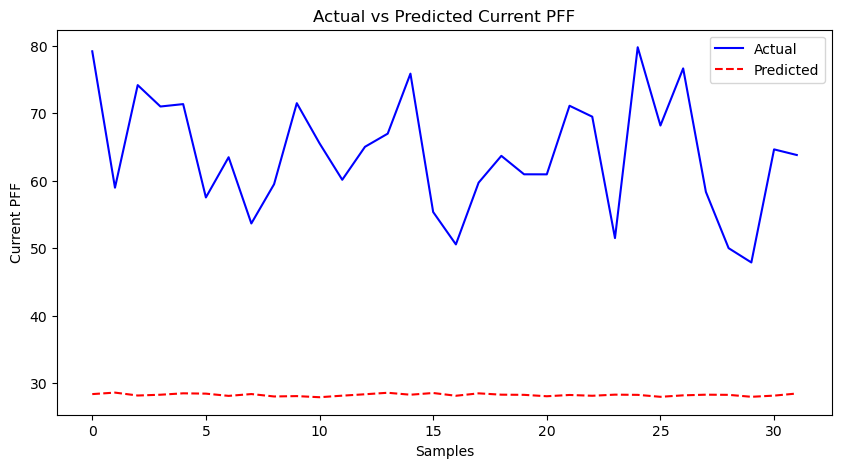

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1190.4403 - val_loss: 749.0099
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 846.6582 - val_loss: 364.9426
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 601.3353 - val_loss: 127.8397
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140.2954 - val_loss: 98.6367
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.4623 - val_loss: 194.7402
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 268.6631 - val_loss: 212.1606
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 210.6555 - val_loss: 127.5901
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.2953 - val_loss: 83.7316
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.9356 - val_loss: 80.7694
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201.1414 - val_loss: 85.2513
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.3841 - val_loss: 82.4902
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

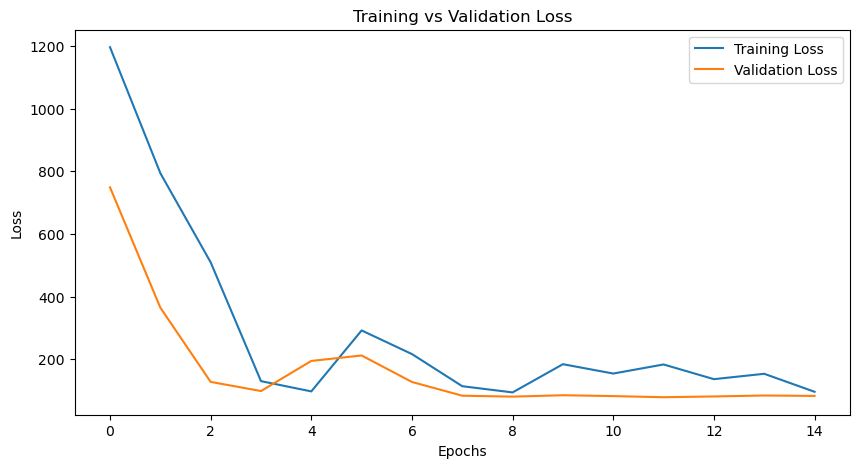

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.0799


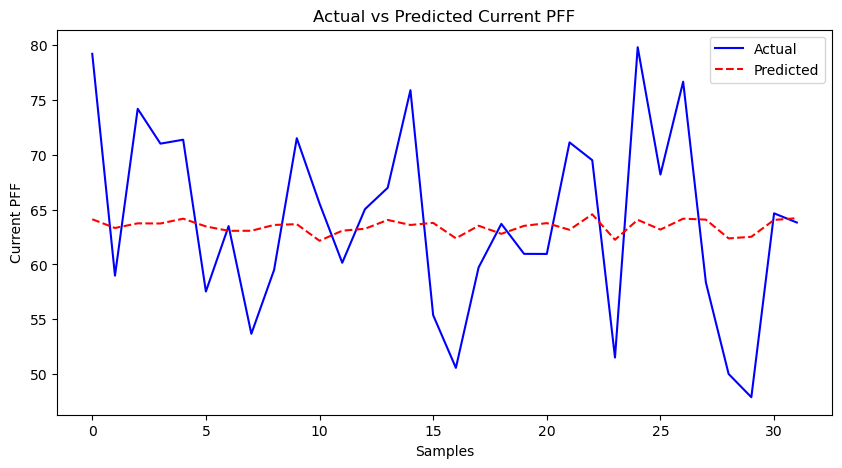

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 111.4103 - val_loss: 82.9665
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.0550 - val_loss: 82.5386
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.5049 - val_loss: 77.2383
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.1038 - val_loss: 74.3813
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.2801 - val_loss: 72.7286
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 169.8580 - val_loss: 74.7352
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172.8473 - val_loss: 94.6641
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170.7376 - val_loss: 115.4270
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.3800 - val_loss: 94.8390
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 154.9124 - val_loss: 87.8691
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.3493 - val_loss: 80.9242
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.867

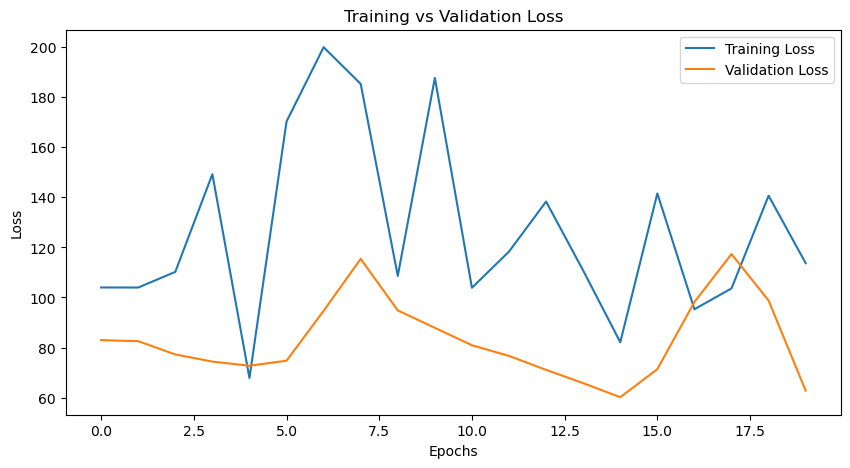

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.3705


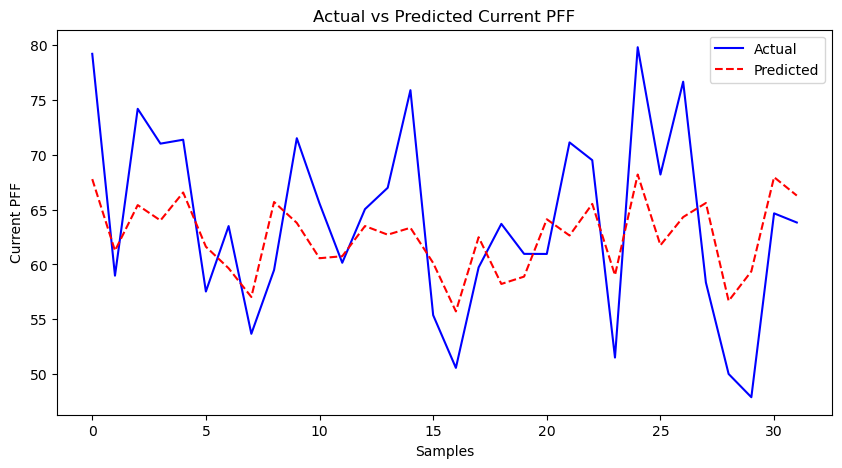

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97.7883 - val_loss: 58.1845
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.5904 - val_loss: 57.5044
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.1261 - val_loss: 59.8668
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134.1499 - val_loss: 62.2044
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114.9124 - val_loss: 81.1863
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.4383 - val_loss: 109.1771
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.3252 - val_loss: 143.6037
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102.5268 - val_loss: 122.1776
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.2285 - val_loss: 82.6997
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.3451 - val_loss: 63.3870
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.8687 - val_loss: 67.3789
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.3473 -

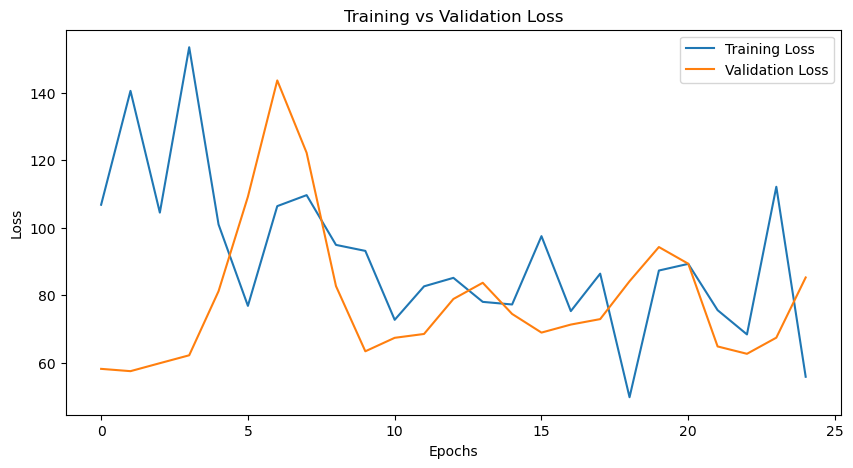

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.5131


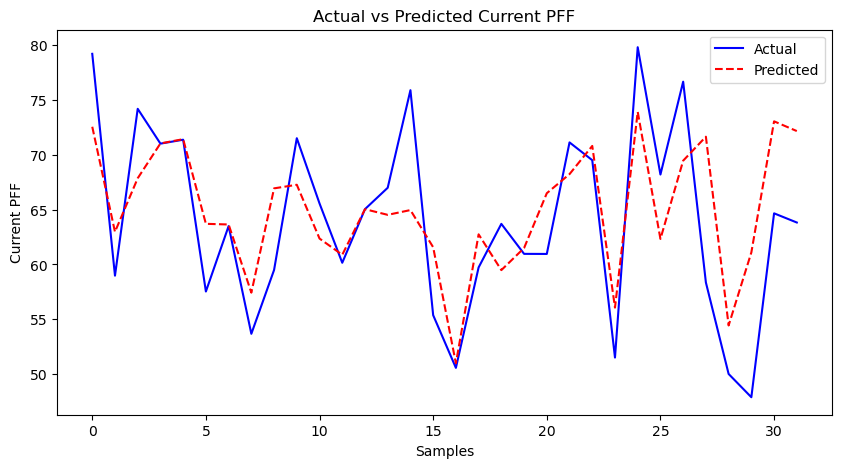

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.4161 - val_loss: 103.8617
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.1755 - val_loss: 104.0319
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.8089 - val_loss: 89.4741
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.7422 - val_loss: 72.9912
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138.2424 - val_loss: 75.4276
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.7093 - val_loss: 77.4511
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.0071 - val_loss: 98.1617
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.6103 - val_loss: 111.3661
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.0704 - val_loss: 93.7957
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.8450 - val_loss: 95.2130
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.6817 - val_loss: 112.1425
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.9686 -

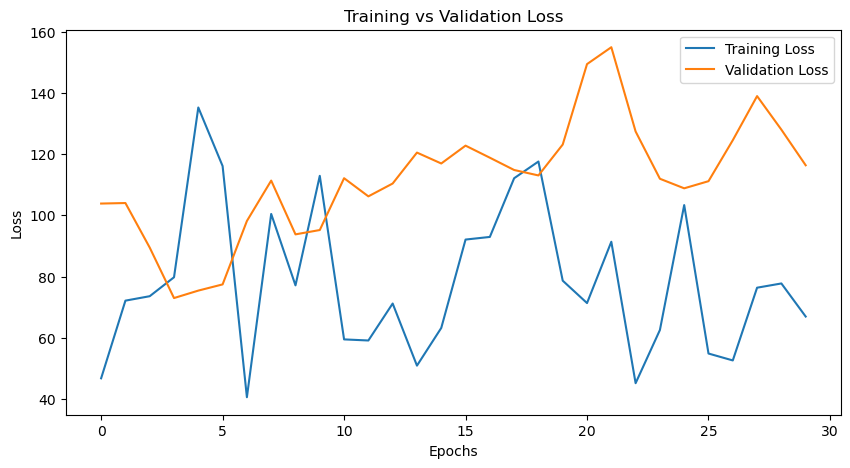

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4842


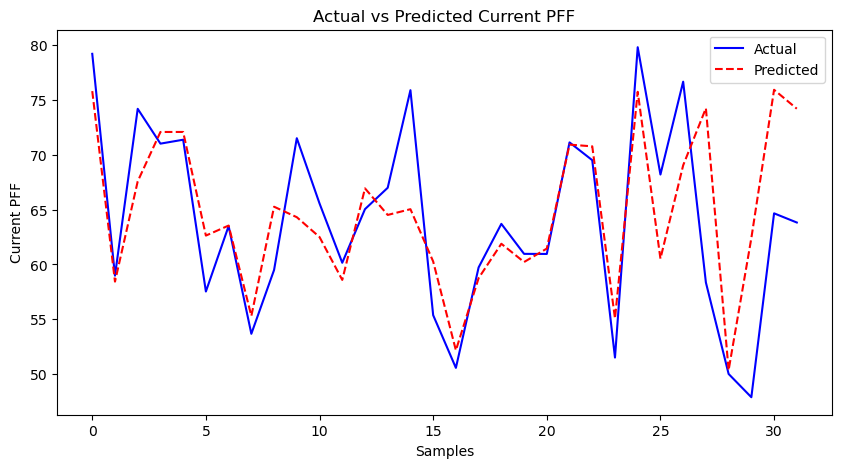

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60.1771 - val_loss: 106.4352
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.6966 - val_loss: 98.8907
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.3402 - val_loss: 96.6590
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.7527 - val_loss: 95.8771
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.9732 - val_loss: 103.7516
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.2107 - val_loss: 121.4899
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.4003 - val_loss: 131.0826
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.6690 - val_loss: 123.6383
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.0651 - val_loss: 106.7126
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.4478 - val_loss: 113.7656
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.4276 - val_loss: 121.3974
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.2777 -

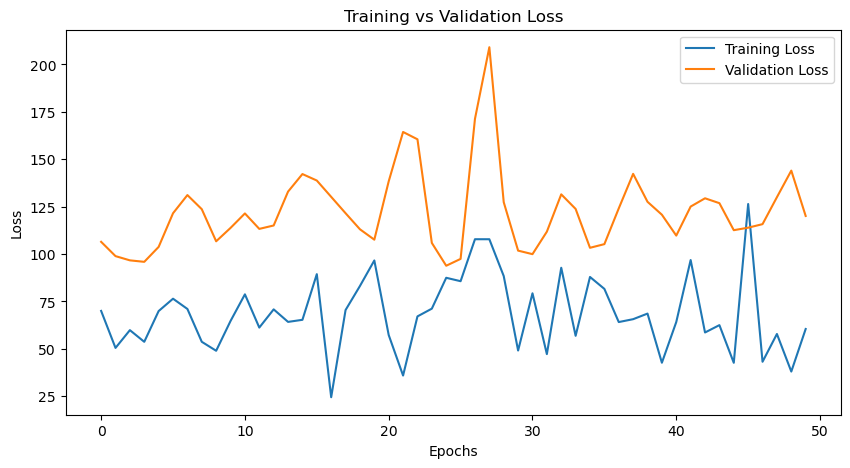

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.5144


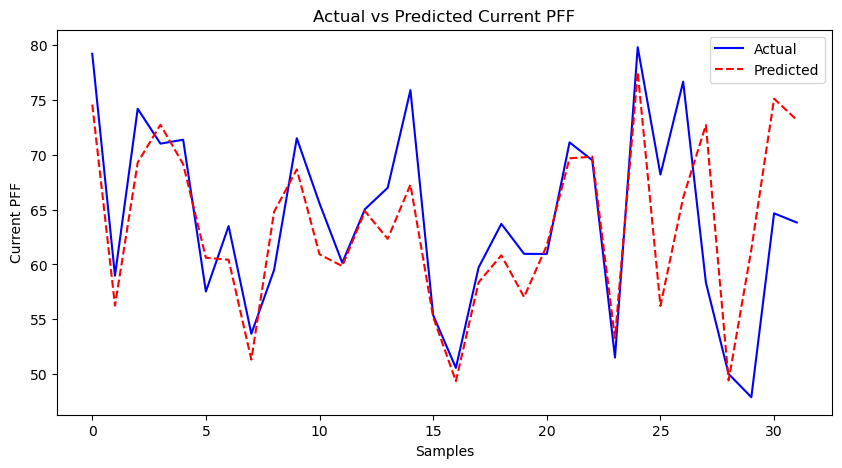

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63.2986 - val_loss: 116.1748
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.5405 - val_loss: 124.0685
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.1941 - val_loss: 155.4287
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6642 - val_loss: 160.1609
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.8588 - val_loss: 129.5869
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.3513 - val_loss: 125.7866
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.8502 - val_loss: 127.4503
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.7774 - val_loss: 134.9378
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5391 - val_loss: 137.2484
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.9049 - val_loss: 139.7956
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.2664 - val_loss: 164.2536
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

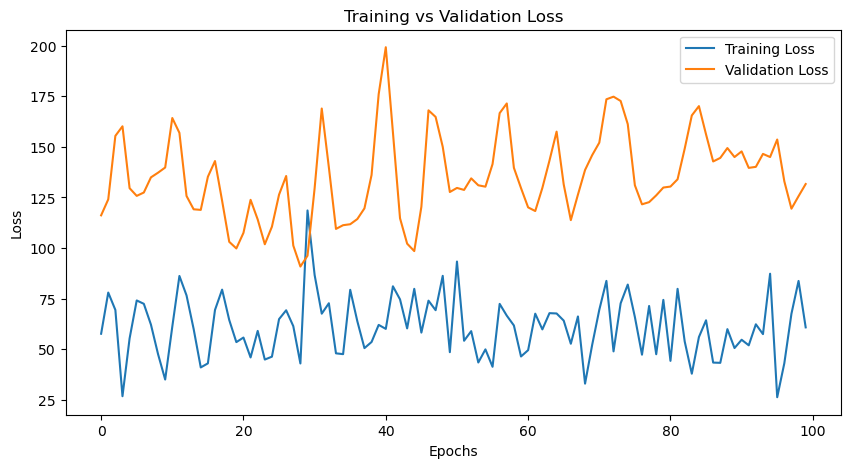

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.4996


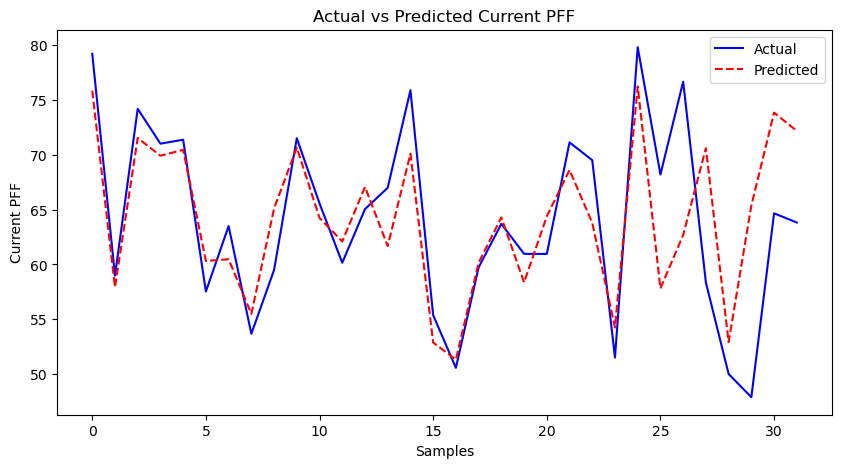

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55.3494 - val_loss: 163.8989
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.3357 - val_loss: 166.7825
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.7272 - val_loss: 138.0401
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.8427 - val_loss: 142.2872
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.3170 - val_loss: 154.9851
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.9284 - val_loss: 149.3561
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.6403 - val_loss: 159.3308
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.2126 - val_loss: 163.7524
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.3165 - val_loss: 159.9159
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.6887 - val_loss: 142.3267
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.3839 - val_loss: 118.1063
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

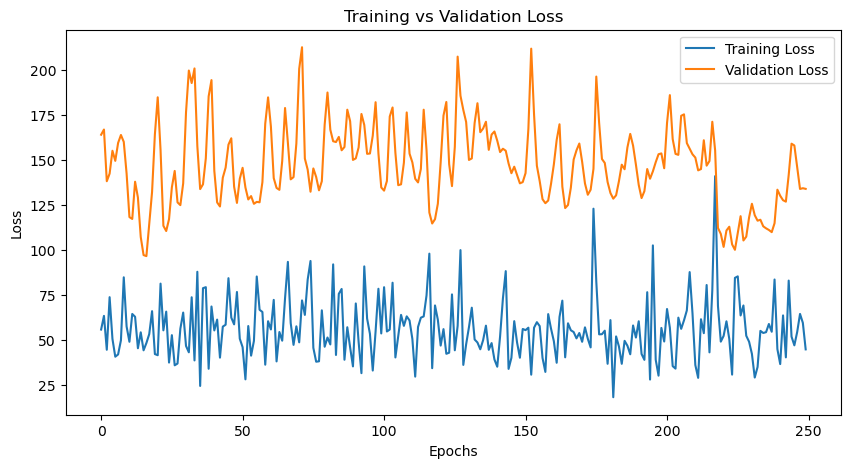

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4839


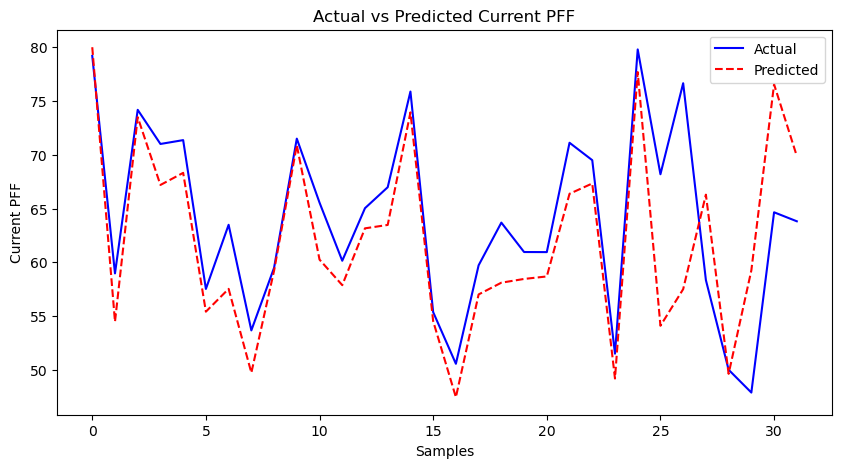

In [31]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()

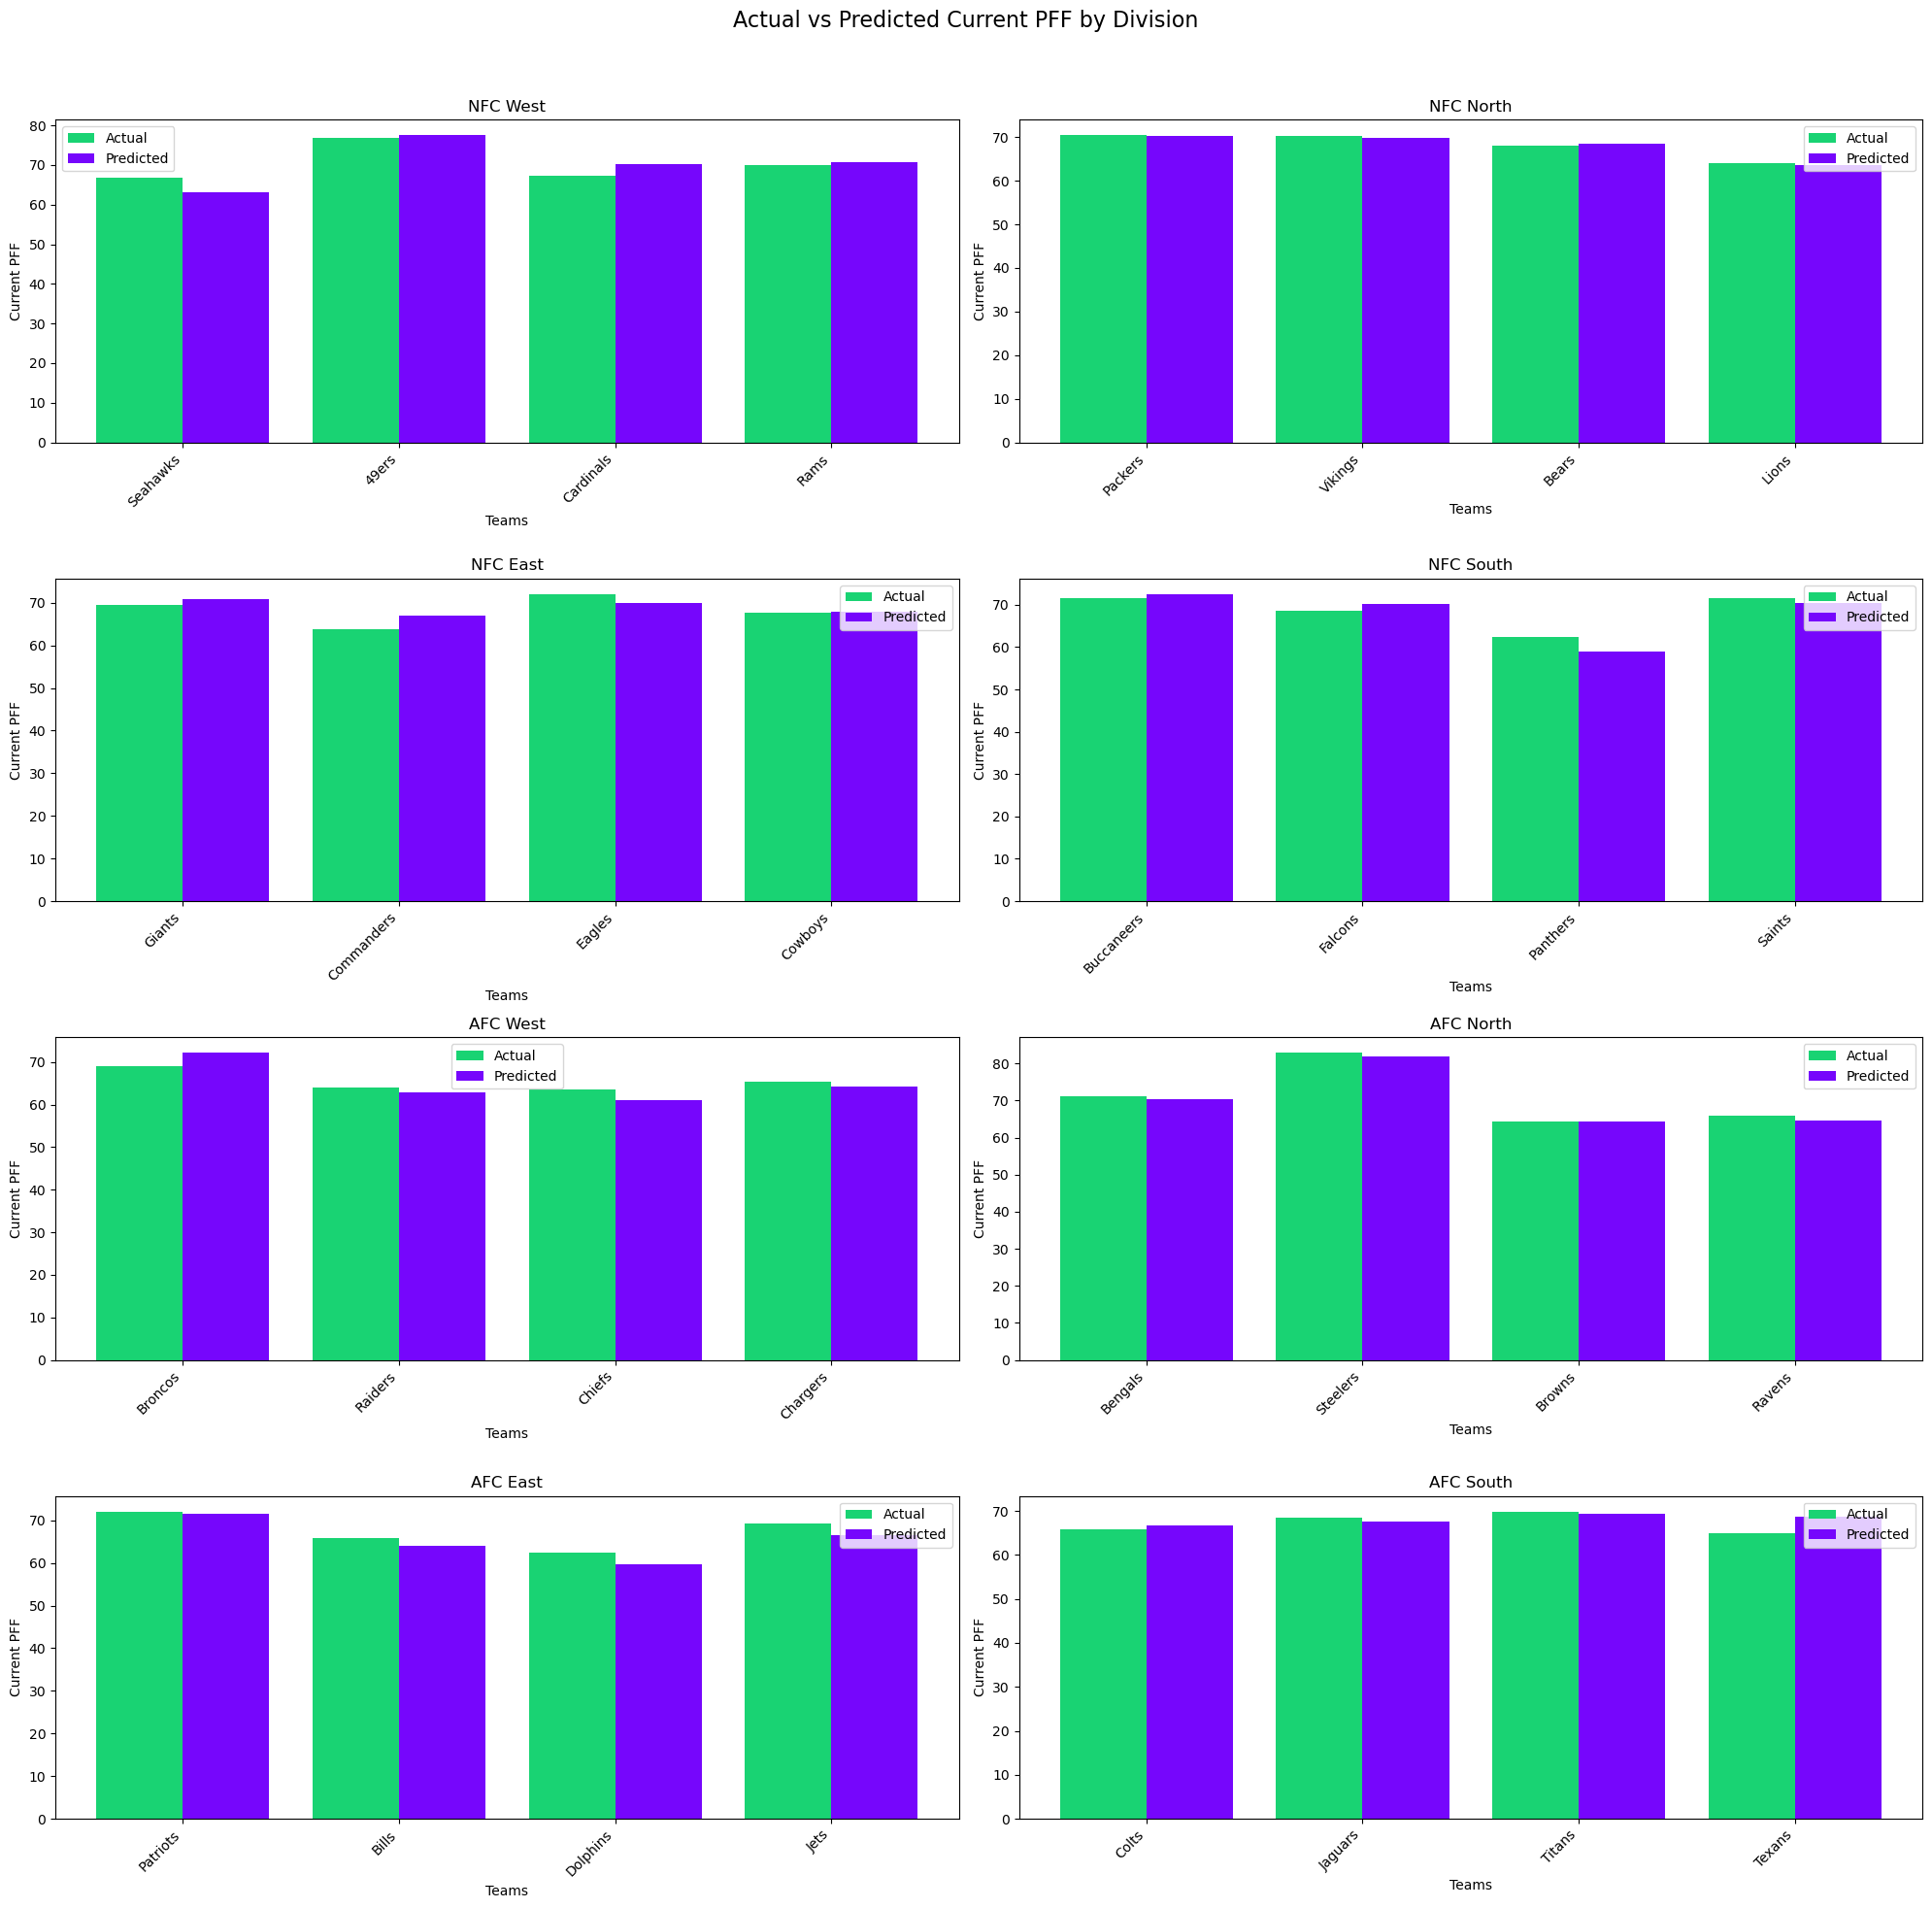

In [32]:
# Updated code with the user-provided hex colors for the bar plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'
data = pd.read_csv(file_path)

# Filter for the latest year (if applicable) or ensure one entry per team
# Here, we'll use the first occurrence for simplicity
data = data.drop_duplicates(subset='Team', keep='first')

# Extract relevant columns
teams = data['Team'].values  # Team names
y = data['Current_PFF'].values  # Actual values (Current PFF)

# Mock predicted values for demonstration (replace with model predictions)
np.random.seed(42)  # For reproducibility
y_pred = y + np.random.normal(0, 2, size=len(y))  # Add small noise to actual values

# Division mapping
divisions = {
    'NFC West': ['49ers', 'Seahawks', 'Rams', 'Cardinals'],
    'NFC North': ['Packers', 'Vikings', 'Bears', 'Lions'],
    'NFC East': ['Cowboys', 'Giants', 'Eagles', 'Commanders'],
    'NFC South': ['Saints', 'Falcons', 'Buccaneers', 'Panthers'],
    'AFC West': ['Chiefs', 'Raiders', 'Broncos', 'Chargers'],
    'AFC North': ['Ravens', 'Bengals', 'Browns', 'Steelers'],
    'AFC East': ['Bills', 'Patriots', 'Dolphins', 'Jets'],
    'AFC South': ['Colts', 'Titans', 'Jaguars', 'Texans']
}

# Initialize storage for plotting
division_data = {}

# Group teams by division
for division, division_teams in divisions.items():
    mask = np.isin(teams, division_teams)  # Find teams in this division
    division_data[division] = {
        'teams': teams[mask],
        'y': y[mask],
        'y_pred': y_pred[mask]
    }

# Plot each division separately
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns
fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)

for ax, (division, data) in zip(axes.flatten(), division_data.items()):
    teams_div = data['teams']
    y_div = data['y']
    y_pred_div = data['y_pred']
    x = np.arange(len(teams_div))  # Generate x-axis positions
    width = 0.4  # Bar width

    # Plot actual and predicted for this division
    ax.bar(x - width / 2, y_div, width, label='Actual', color='#19D373')  # Hex for Actual
    ax.bar(x + width / 2, y_pred_div, width, label='Predicted', color='#7606FC')  # Hex for Predicted
    
    ax.set_xticks(x)
    ax.set_xticklabels(teams_div, rotation=45, ha='right')
    ax.set_title(division)
    ax.set_xlabel('Teams')
    ax.set_ylabel('Current PFF')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [33]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# Function to prepare data sequences for a given target metric
def prepare_sequences(lb_df, target_metric, sequence_length=3):
    sequences = []
    targets = []
    team_data = lb_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][[
                    'Previous_grades_tackle', 
                    'Previous_AV',
                    'Previous_PFF',
                    'Previous_franchise_id',
                    'Previous_grades_run_defense',
                    'Previous_grades_coverage_defense',
                    'Previous_tackles_for_loss'
                ]]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)
    
    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)
    
    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    
    return X, y, scaler


In [35]:
# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add RNN layer to capture temporal dependencies
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    rnn_output = Dropout(0.2)(rnn_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(rnn_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [36]:
# Function to train and evaluate the model
def train_and_evaluate(X, y, target_metric, epochs_list, batch_size=8):
    input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        history = model.fit(
            X, y, 
            epochs=e, 
            batch_size=batch_size, 
            validation_split=0.2, 
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the entire dataset (you might want to separate into train/test)
        y_pred = model.predict(X)
        
        # Calculate R² score
        r2 = r2_score(y, y_pred)
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(y)), y, label='Actual', color='blue', alpha=0.5)
        plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


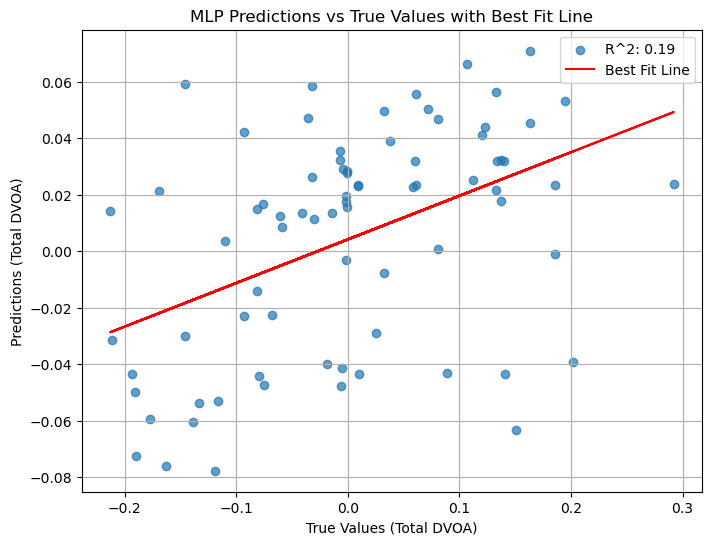

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Preprocessing
data['Total DVOA'] = data['Total DVOA'].str.rstrip('%').astype(float) / 100  # Convert percentages to decimals
data = data.dropna(subset=['Current_PFF', 'Net EPA'])  # Drop rows with missing values

# Add more features
X = data[['Current_PFF']].values  # Example features
y = data[['Net EPA']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an enhanced MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Scatter plot with predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label=f'R^2: {r2:.2f}')

# Line of best fit
m, b = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)  # Linear fit
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

# Plot formatting
plt.xlabel('True Values (Total DVOA)')
plt.ylabel('Predictions (Total DVOA)')
plt.title('MLP Predictions vs True Values with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()



First few rows of the DataFrame:
      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
49   49ers  2019       LB        15.993624        146.484990        28.0   
81   49ers  2019       DB        15.313496        270.589442        35.0   
114  49ers  2020       DL         6.755802       1402.398565        39.0   
146  49ers  2020       LB         2.991927        144.514132        34.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%        0.8125    0.216  ...   
49     63.131934     27.90%        0.8125    0.216  ...   
81     74.600742     27.90%        0.8125    0.216  ...   
114    60.632050      5.40%        0.3750    0.025  ...   
146    73.581955      5.40%        0.3750    0.025  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
49       

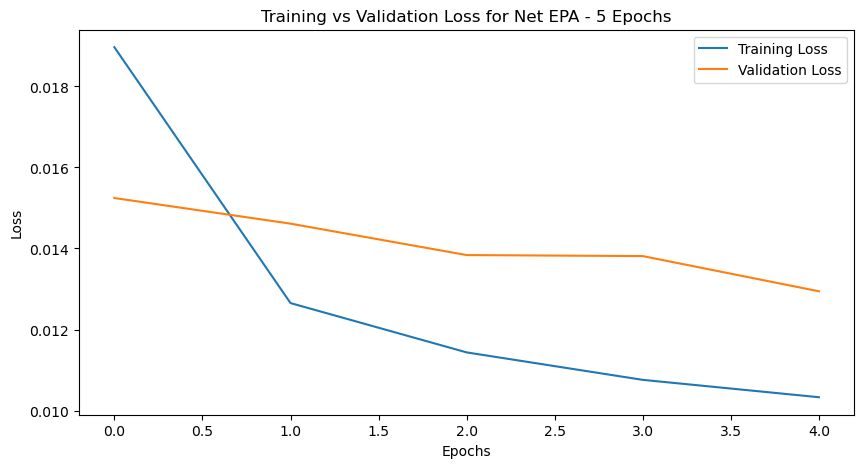

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/stepWARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2ff7db920> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
R² Score for Net EPA after 5 epochs: 0.1979
MAE for Net EPA after 5 epochs: 0.0966
RMSE for Net EPA after 5 epochs: 0.1138


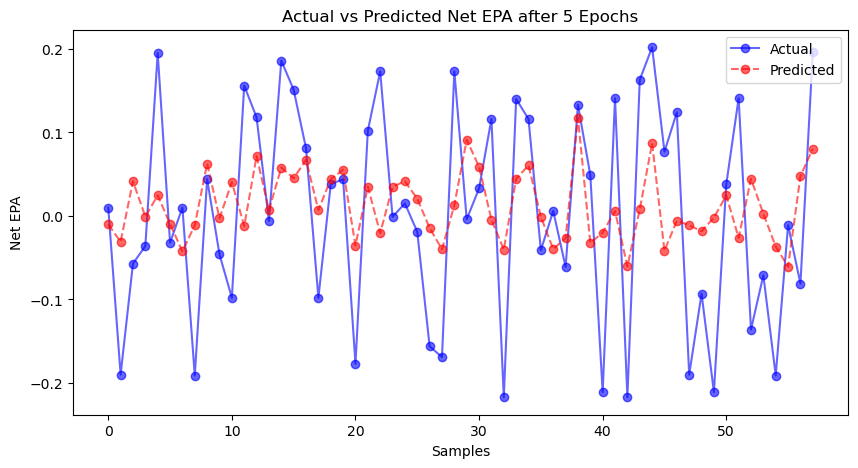


Training Net EPA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - val_loss: 0.0131
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0124
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0115
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0129
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0111
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0107
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - val_loss: 0.0108
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0101
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0098
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0098


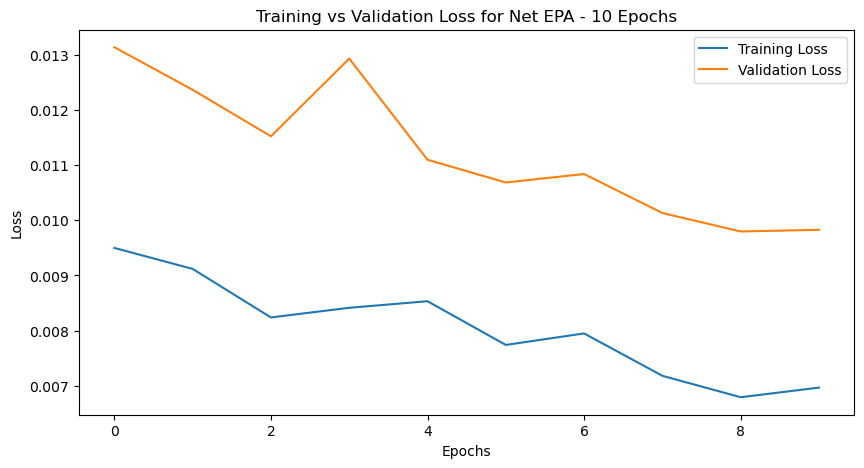

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 10 epochs: 0.3929
MAE for Net EPA after 10 epochs: 0.0835
RMSE for Net EPA after 10 epochs: 0.0990


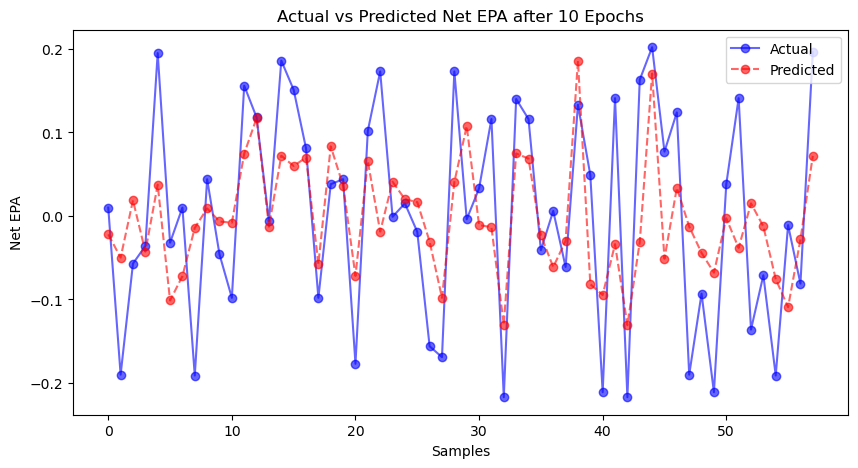


Training Net EPA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0098
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0093
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0089
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0099
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0083
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0089
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0091
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - val_loss: 0.0086
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0089
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0098
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━

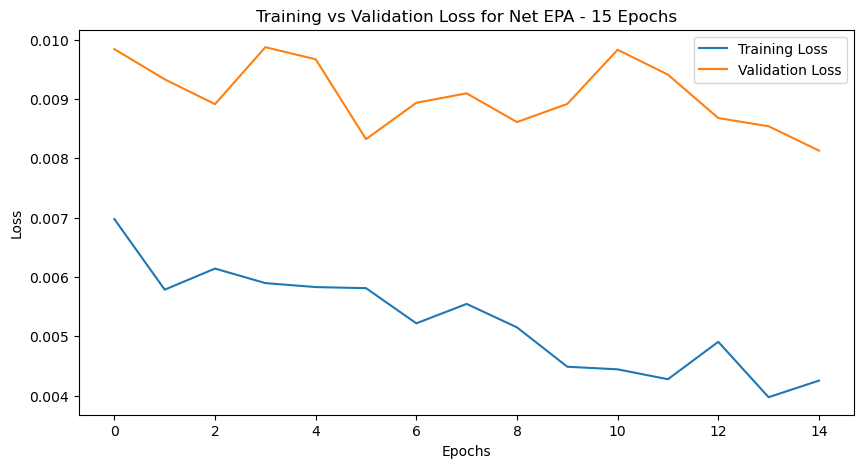

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
R² Score for Net EPA after 15 epochs: 0.4962
MAE for Net EPA after 15 epochs: 0.0723
RMSE for Net EPA after 15 epochs: 0.0902


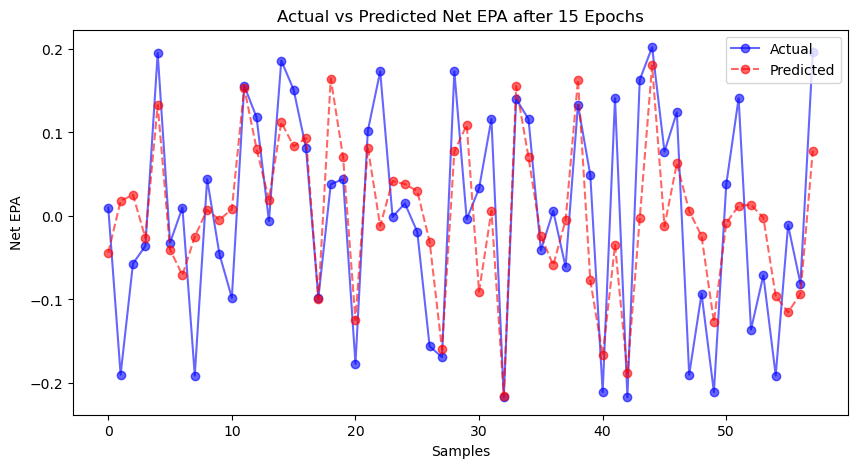


Training Net EPA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0083
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0088
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0084
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - val_loss: 0.0081
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0082
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0086
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0083
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0084
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0079
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━

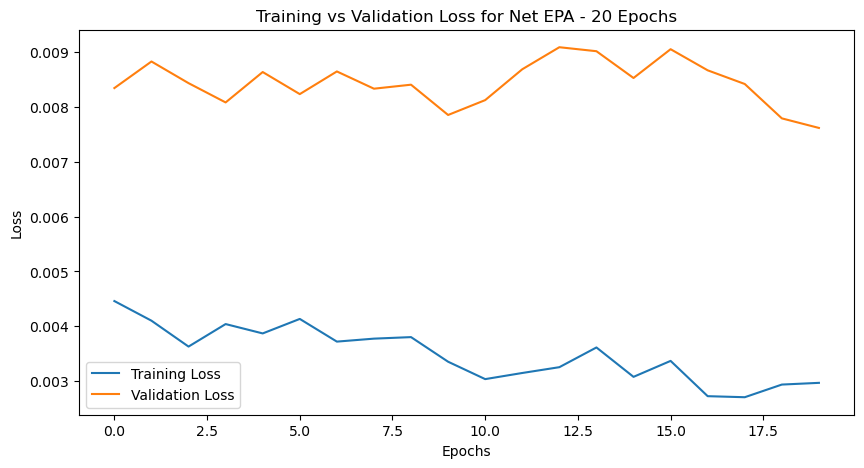

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
R² Score for Net EPA after 20 epochs: 0.5279
MAE for Net EPA after 20 epochs: 0.0677
RMSE for Net EPA after 20 epochs: 0.0873


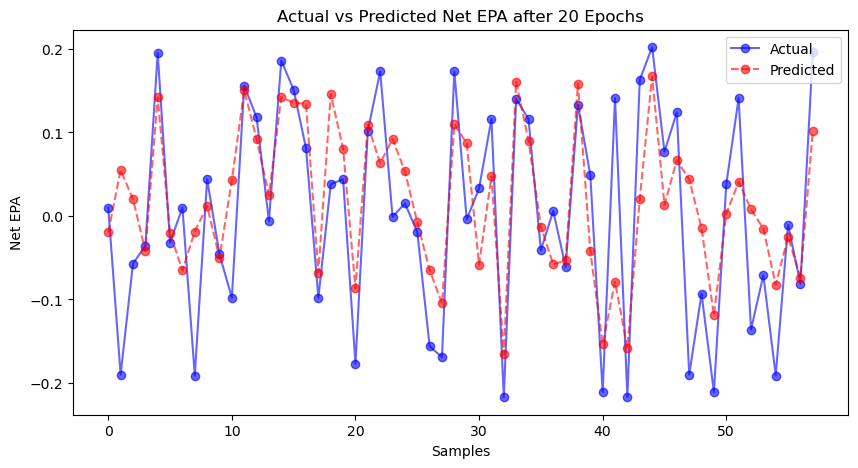


Training Net EPA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0077
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0079
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0080
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0079
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0082
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0079
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0077
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0081
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0082
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0085
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━

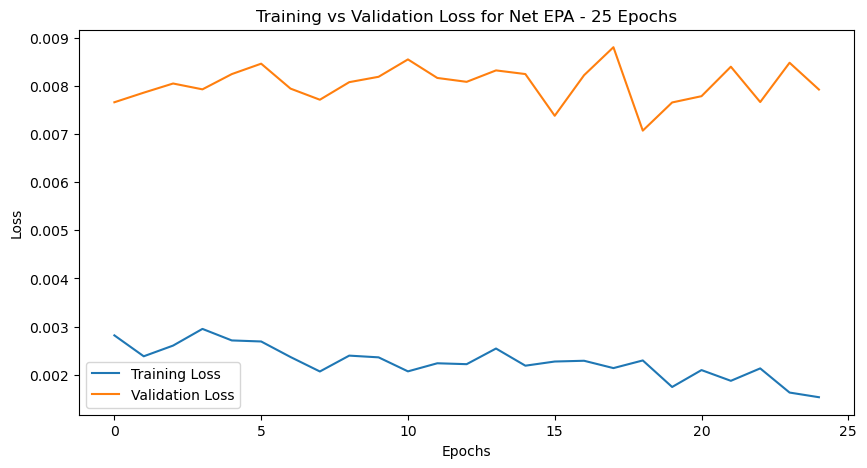

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 25 epochs: 0.5621
MAE for Net EPA after 25 epochs: 0.0656
RMSE for Net EPA after 25 epochs: 0.0841


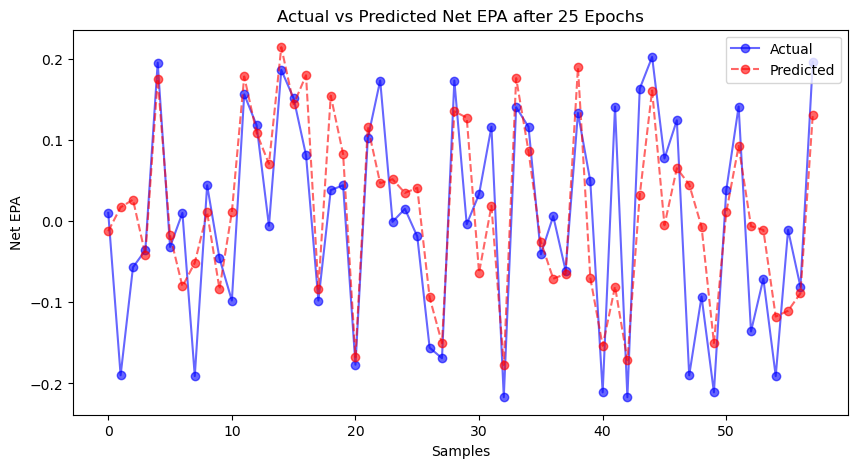


Training Net EPA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0076
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0082
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0074
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0070
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━

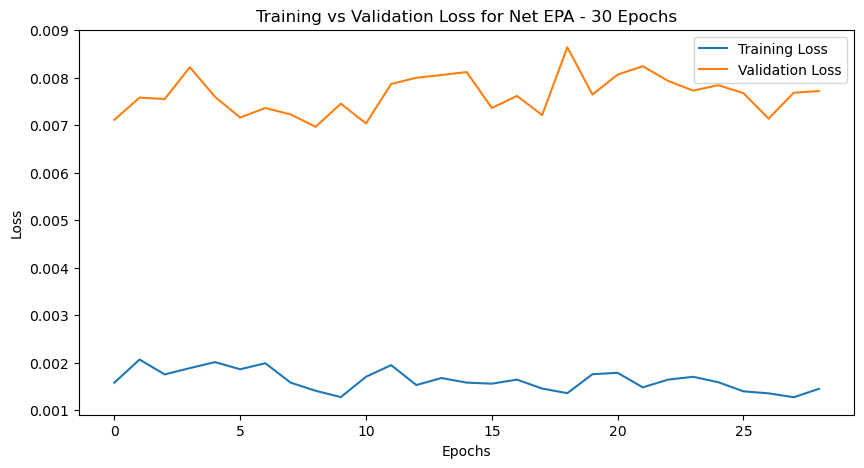

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 30 epochs: 0.5685
MAE for Net EPA after 30 epochs: 0.0638
RMSE for Net EPA after 30 epochs: 0.0834


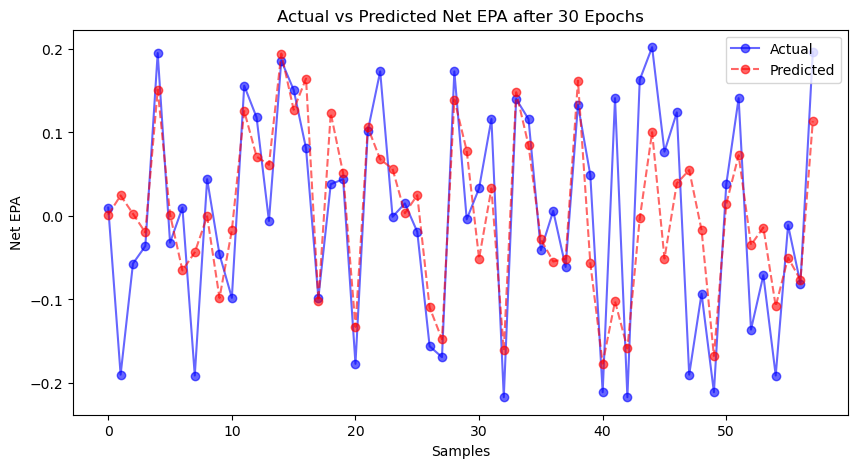


Training Net EPA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0073
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0079
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0074
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0072
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0074
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

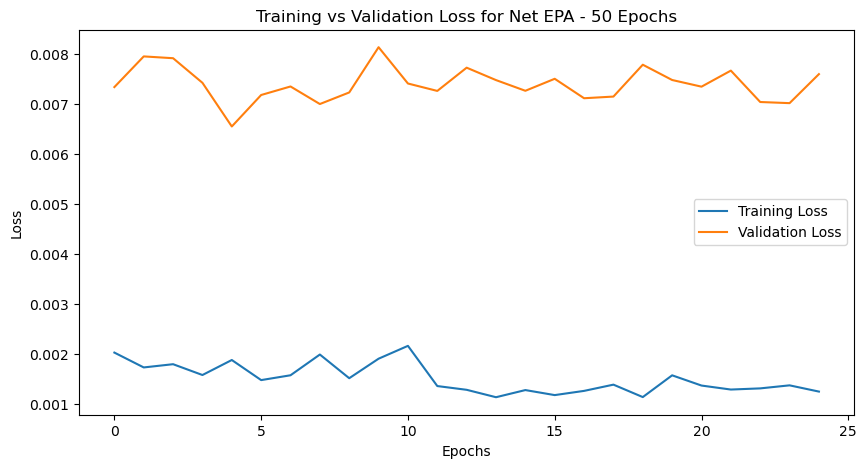

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
R² Score for Net EPA after 50 epochs: 0.5945
MAE for Net EPA after 50 epochs: 0.0622
RMSE for Net EPA after 50 epochs: 0.0809


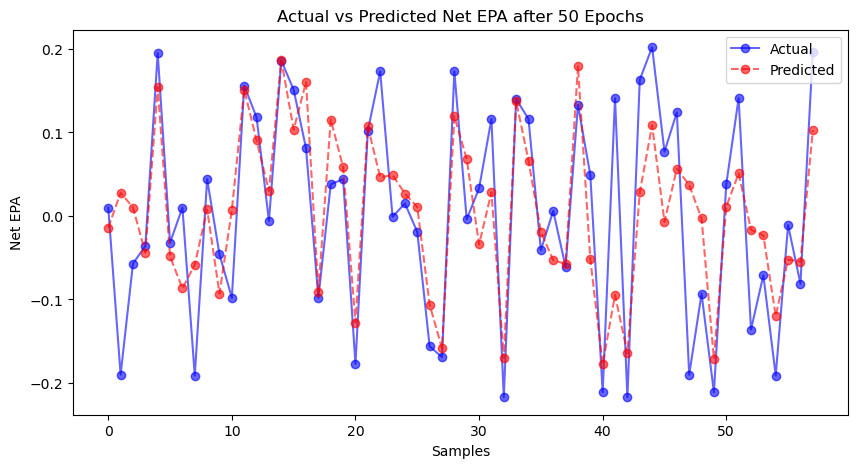


Training Net EPA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0095
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0068
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0073
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0077
Epoch 12/100
29/29 ━━━━━━━

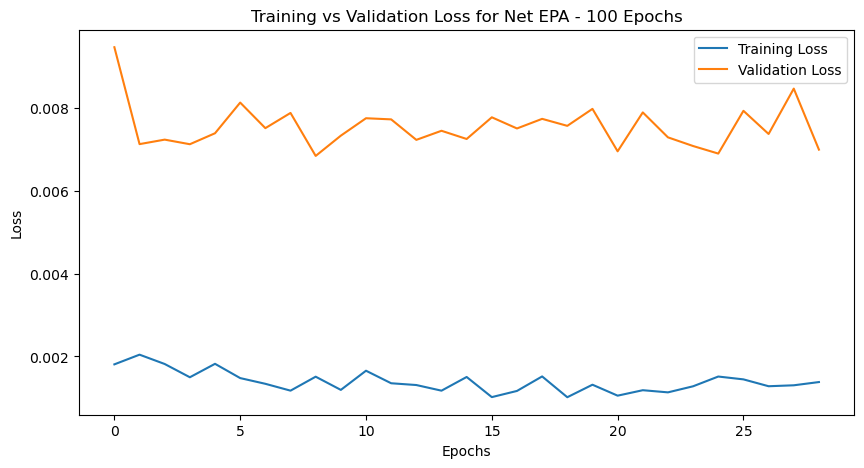

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 100 epochs: 0.5762
MAE for Net EPA after 100 epochs: 0.0655
RMSE for Net EPA after 100 epochs: 0.0827


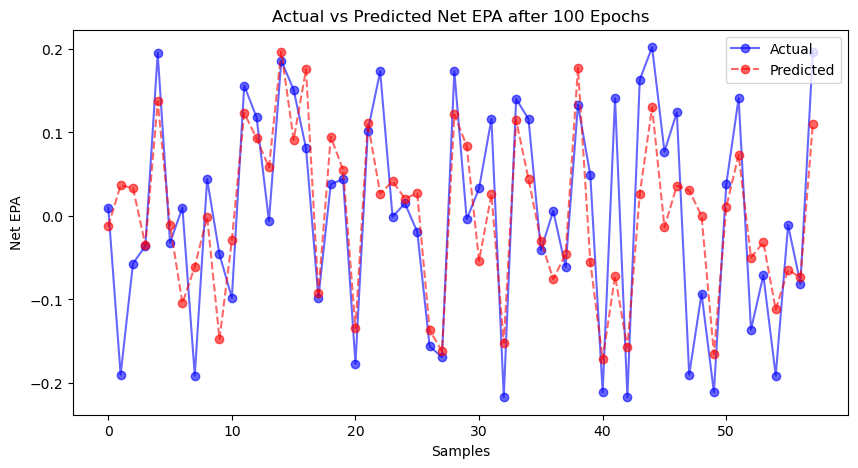


Training Net EPA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0077
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0071
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0079
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0069
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 12/250
29/29 ━━━━━━━

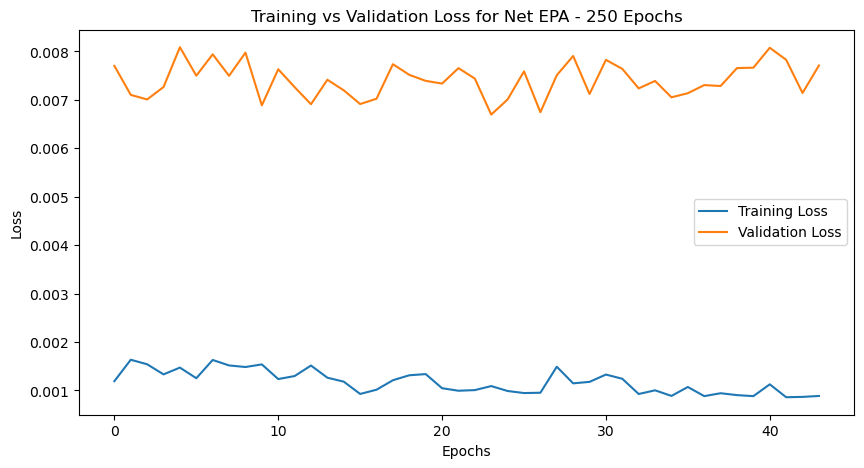

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
R² Score for Net EPA after 250 epochs: 0.5851
MAE for Net EPA after 250 epochs: 0.0631
RMSE for Net EPA after 250 epochs: 0.0818


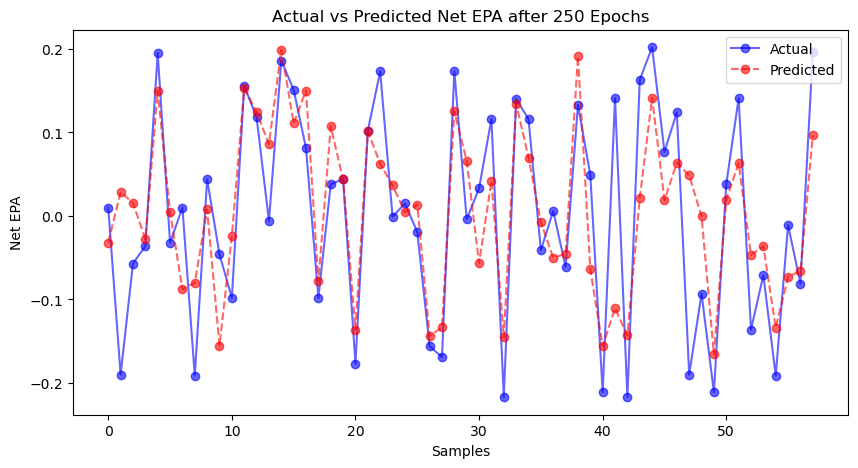


Preparing data for target metric: Total DVOA
Total sequences generated for Total DVOA: 288
X shape: (288, 3, 7), y shape: (288,)

Data Types in X_train: float64
Data Types in X_test: float64
Data Types in y_train: float64
Data Types in y_test: float64

Training Total DVOA with 5 epochs...
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0457 - val_loss: 0.0353
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252 - val_loss: 0.0357
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227 - val_loss: 0.0364
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232 - val_loss: 0.0334
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 - val_loss: 0.0334


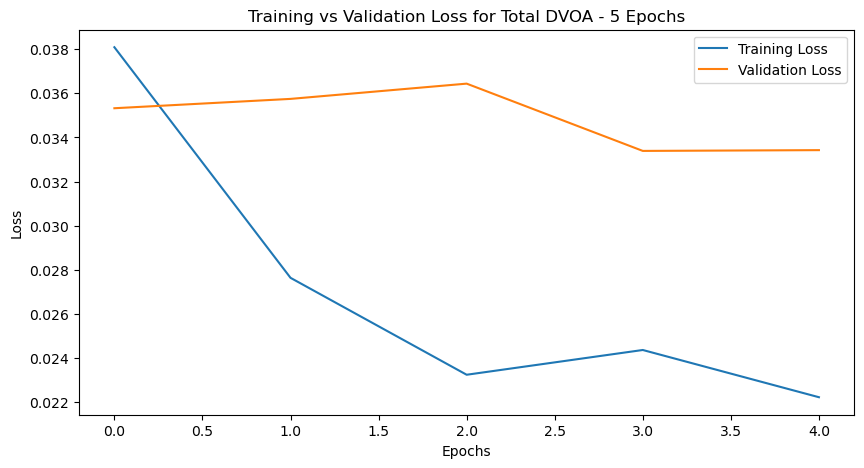

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
R² Score for Total DVOA after 5 epochs: 0.0917
MAE for Total DVOA after 5 epochs: 0.1543
RMSE for Total DVOA after 5 epochs: 0.1827


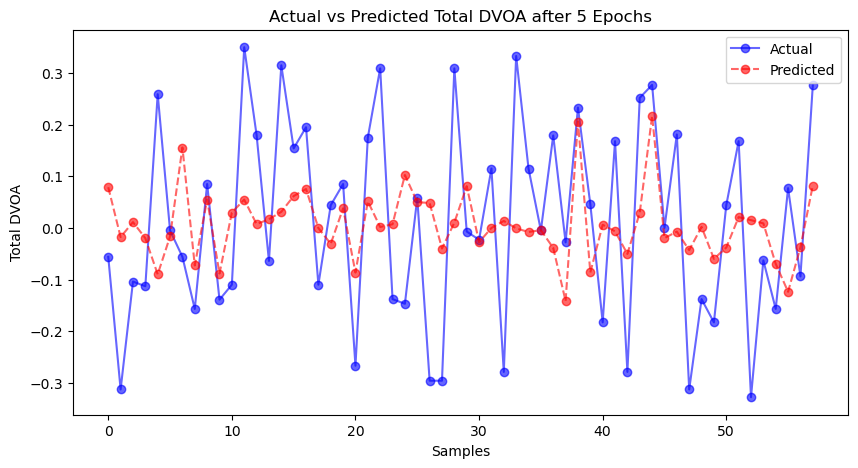


Training Total DVOA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0356
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0254 - val_loss: 0.0327
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 - val_loss: 0.0320
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - val_loss: 0.0309
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 - val_loss: 0.0296
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 - val_loss: 0.0314
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 - val_loss: 0.0276
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0161 - val_loss: 0.0273
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0175 - val_loss: 0.0278
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - val_loss: 0.0302


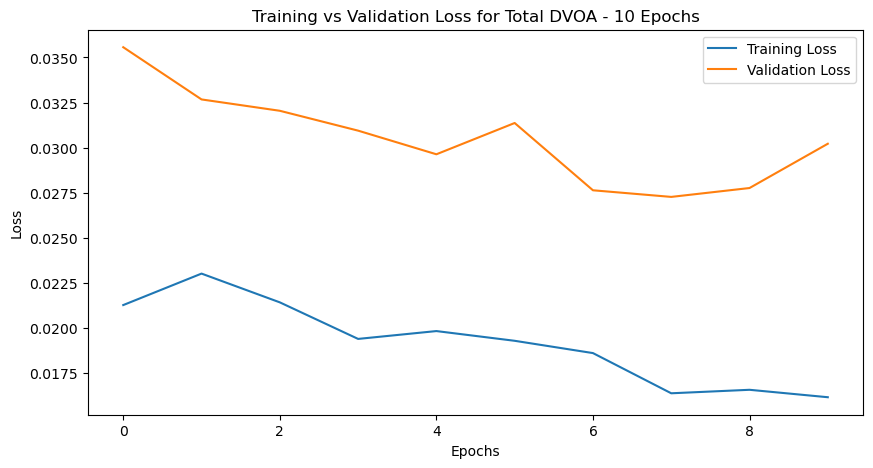

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
R² Score for Total DVOA after 10 epochs: 0.2583
MAE for Total DVOA after 10 epochs: 0.1365
RMSE for Total DVOA after 10 epochs: 0.1651


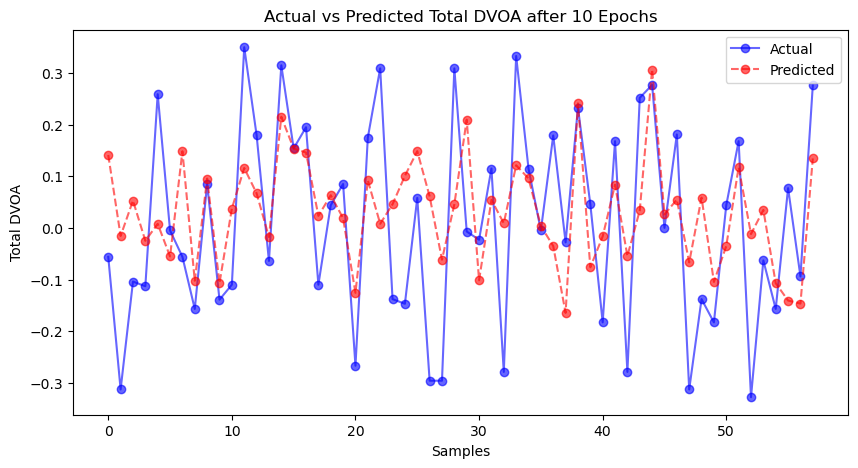


Training Total DVOA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0274
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148 - val_loss: 0.0264
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 - val_loss: 0.0262
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 - val_loss: 0.0275
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135 - val_loss: 0.0288
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0139 - val_loss: 0.0250
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0146 - val_loss: 0.0260
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135 - val_loss: 0.0254
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0125 - val_loss: 0.0252
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - val_loss: 0.0249
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0120 - val_loss: 0.0245
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━

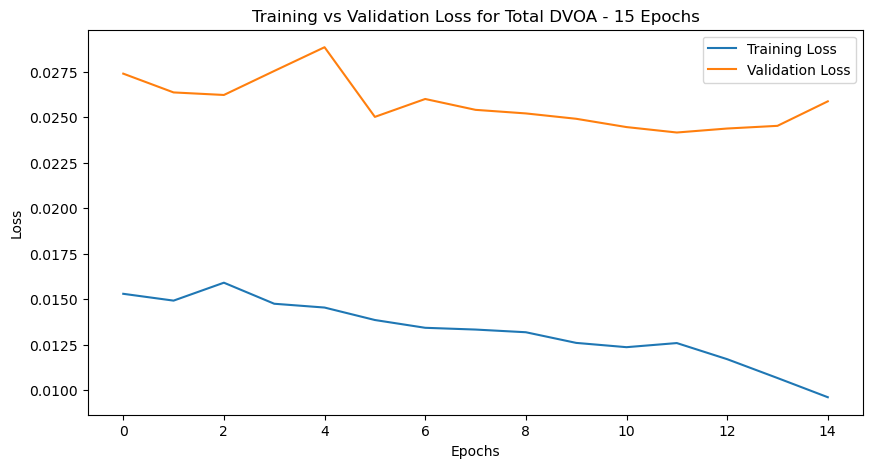

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 15 epochs: 0.3429
MAE for Total DVOA after 15 epochs: 0.1272
RMSE for Total DVOA after 15 epochs: 0.1554


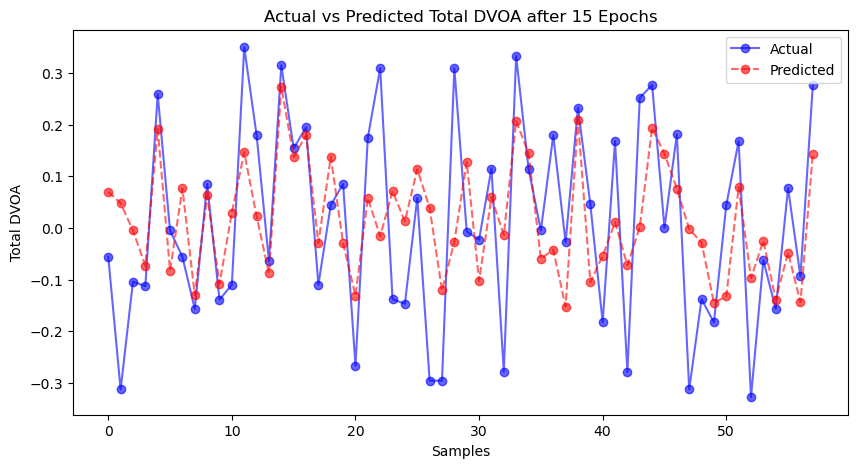


Training Total DVOA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 - val_loss: 0.0238
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - val_loss: 0.0261
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - val_loss: 0.0257
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0255
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106 - val_loss: 0.0241
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0247
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104 - val_loss: 0.0264
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - val_loss: 0.0236
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0243
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0245
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0246
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━

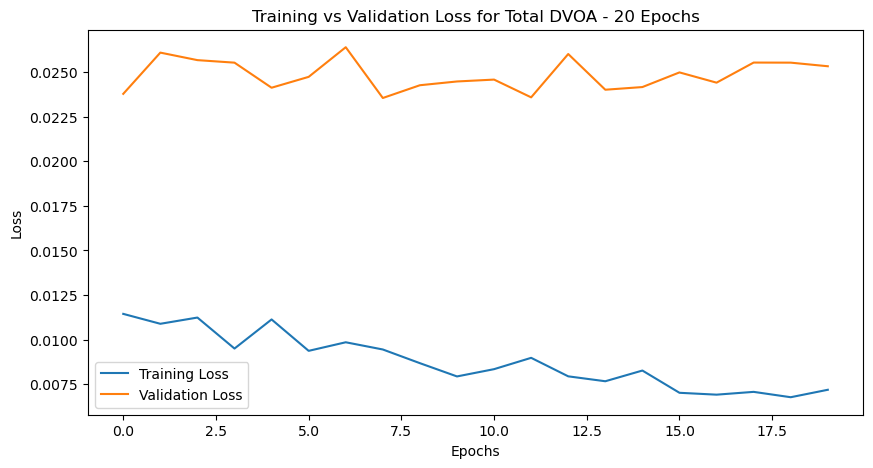

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 20 epochs: 0.3592
MAE for Total DVOA after 20 epochs: 0.1232
RMSE for Total DVOA after 20 epochs: 0.1535


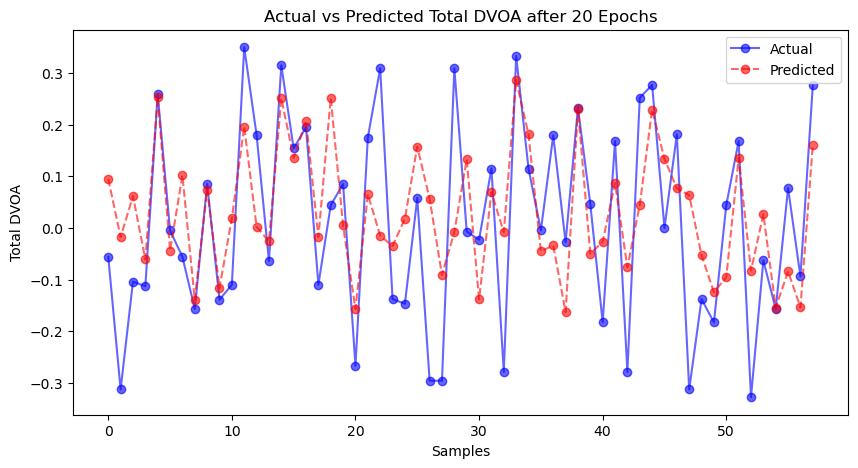


Training Total DVOA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - val_loss: 0.0257
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - val_loss: 0.0238
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0233
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - val_loss: 0.0245
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - val_loss: 0.0243
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0240
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0247
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - val_loss: 0.0252
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0249
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0245
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0246
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━

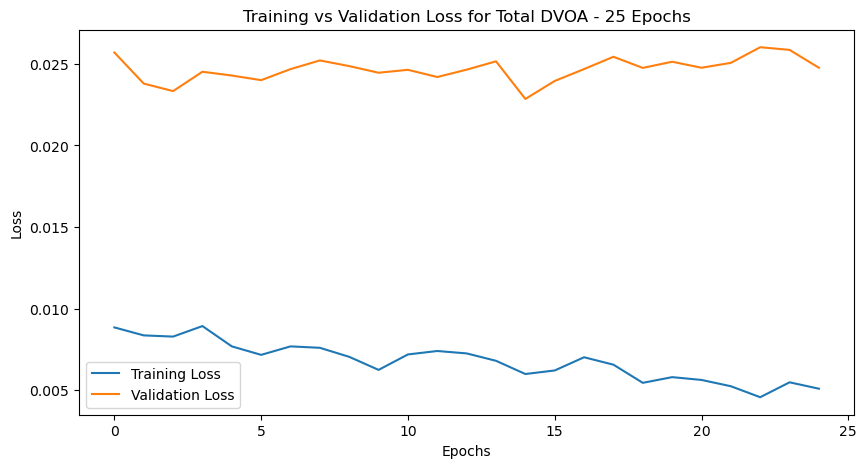

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 25 epochs: 0.3784
MAE for Total DVOA after 25 epochs: 0.1156
RMSE for Total DVOA after 25 epochs: 0.1512


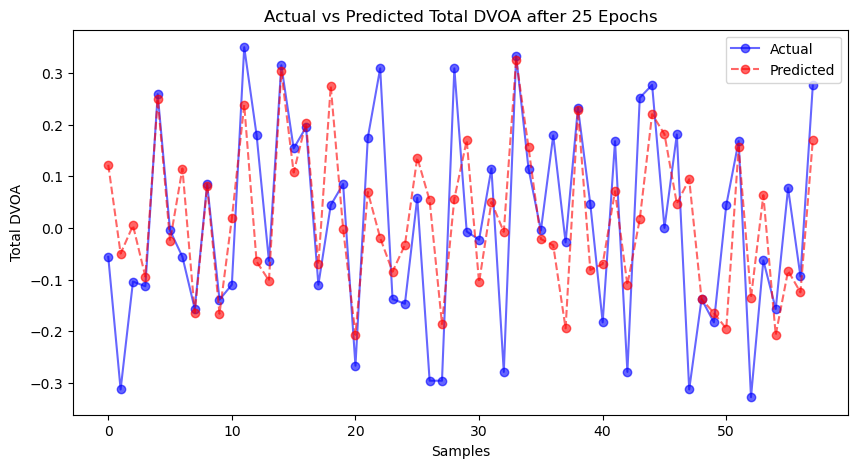


Training Total DVOA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0250
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - val_loss: 0.0237
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0242
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0266
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0252
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0246
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0252
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0252
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0256
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - val_loss: 0.0238
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0240
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━

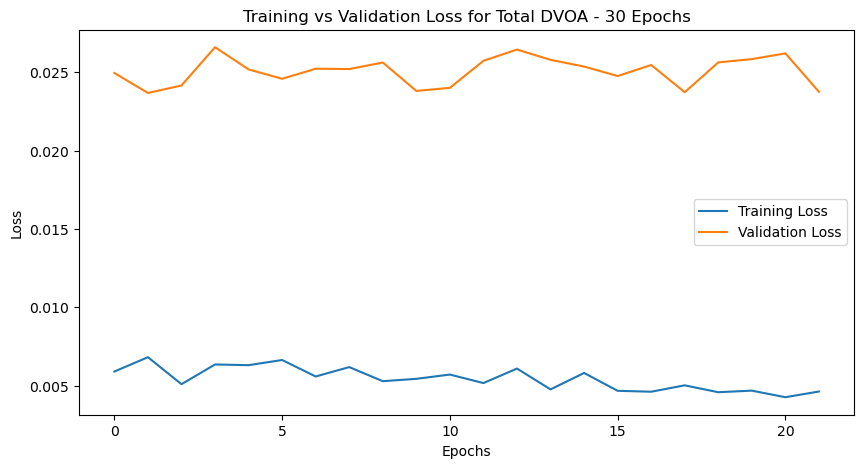

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 30 epochs: 0.3558
MAE for Total DVOA after 30 epochs: 0.1212
RMSE for Total DVOA after 30 epochs: 0.1539


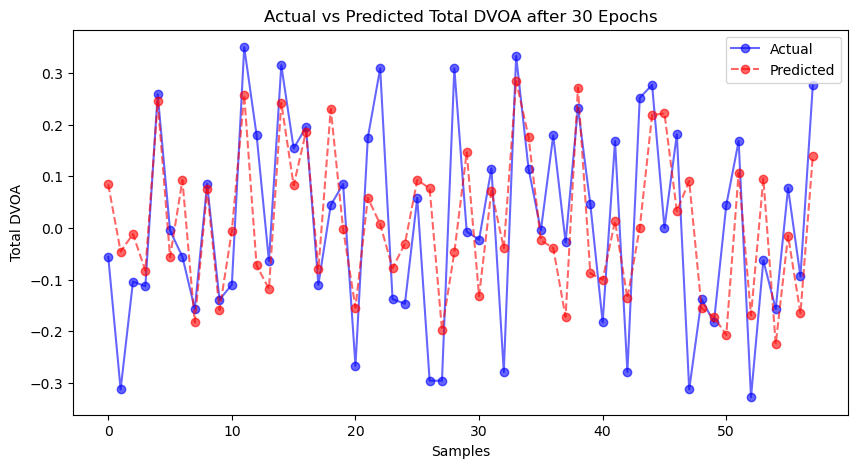


Training Total DVOA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0254
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0250
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0263
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - val_loss: 0.0298
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0276
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0259
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0253
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0256
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - val_loss: 0.0253
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0249
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0262
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━

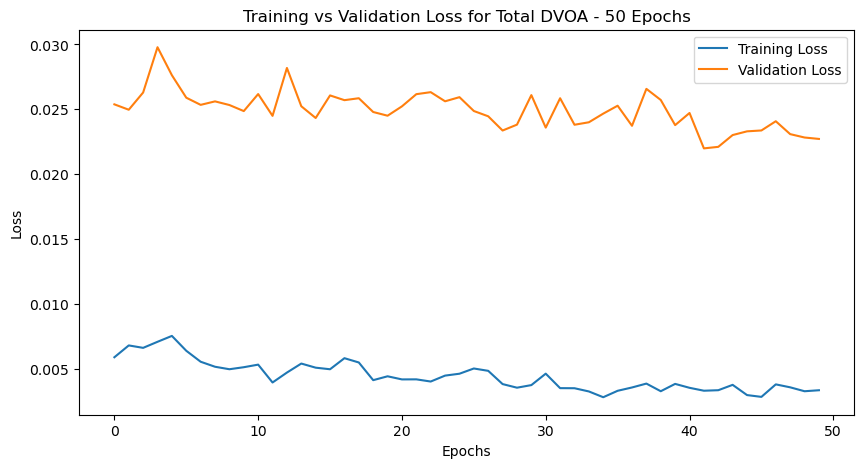

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 50 epochs: 0.4017
MAE for Total DVOA after 50 epochs: 0.1128
RMSE for Total DVOA after 50 epochs: 0.1483


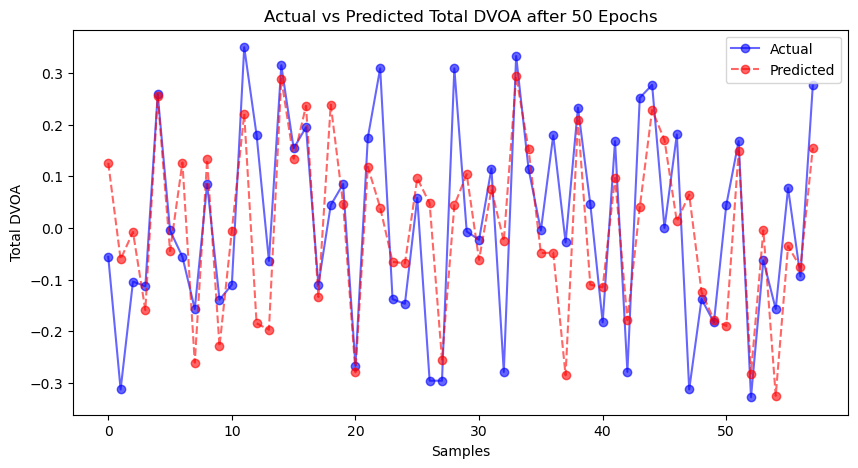


Training Total DVOA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 0.0248
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0232
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0236
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0248
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0263
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0246
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - val_loss: 0.0246
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0237
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0249
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0222
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0233
Epoch 12/100
29/29 ━━━━

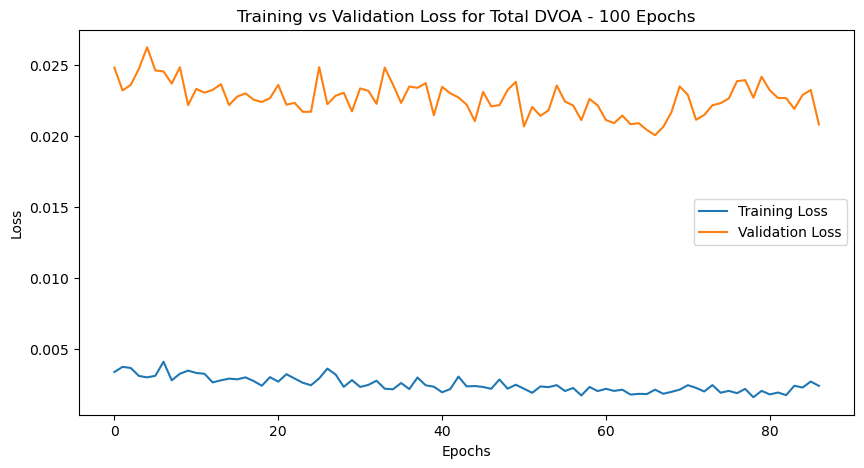

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
R² Score for Total DVOA after 100 epochs: 0.4542
MAE for Total DVOA after 100 epochs: 0.1070
RMSE for Total DVOA after 100 epochs: 0.1416


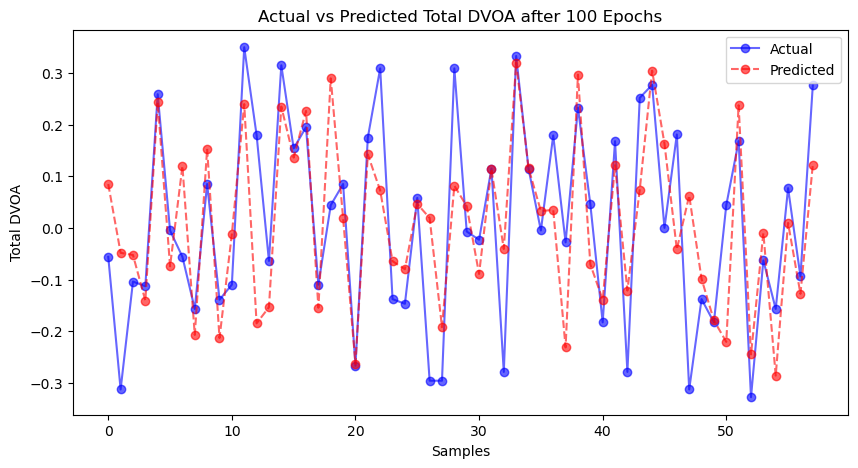


Training Total DVOA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0207
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0215
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0218
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0205
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0217
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0229
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0218
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0230
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0236
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0222
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0222
Epoch 12/250
29/29 ━━━━

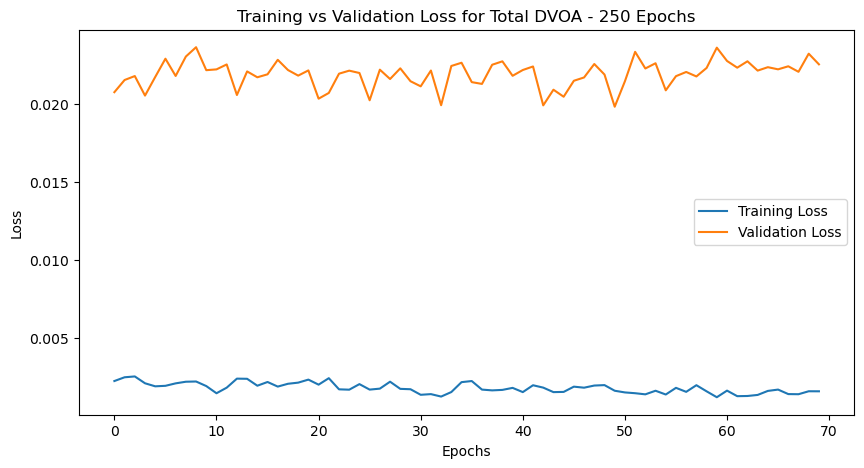

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Score for Total DVOA after 250 epochs: 0.4609
MAE for Total DVOA after 250 epochs: 0.1060
RMSE for Total DVOA after 250 epochs: 0.1408


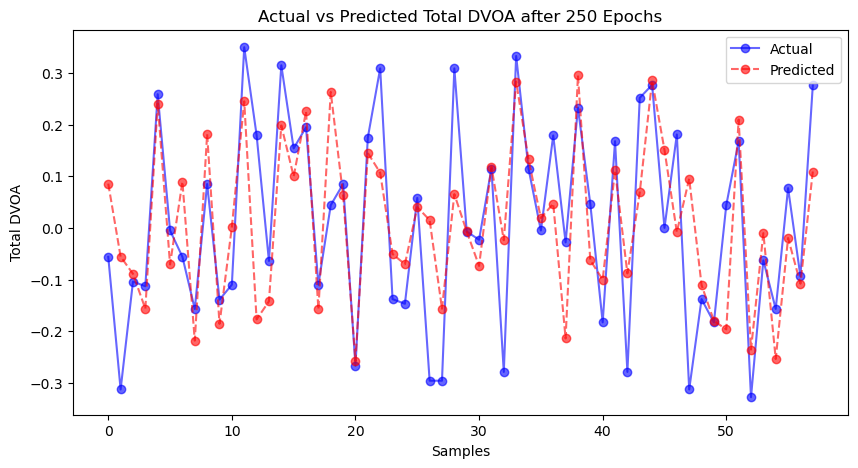

In [38]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Function to clean percentage columns
def clean_percentage_column(lb_df, column):
    # Remove '%' and convert to float, then divide by 100 if it's a percentage
    lb_df[column] = lb_df[column].str.replace('%', '').astype(float) / 100.0
    return lb_df

# Function to prepare data sequences for a given target metric
def prepare_sequences(lb_df, target_metric, feature_cols, sequence_length=3, test_size=0.2):
    sequences = []
    targets = []
    team_data = lb_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][feature_cols]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)

    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)

    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add LSTM layer to capture temporal dependencies
    lstm_output = LSTM(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    lstm_output = Dropout(0.2)(lstm_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(lstm_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, target_metric, epochs_list, batch_size=8):
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    # Debugging: Check data types
    print("\nData Types in X_train:", X_train.dtype)
    print("Data Types in X_test:", X_test.dtype)
    print("Data Types in y_train:", y_train.dtype)
    print("Data Types in y_test:", y_test.dtype)
    
    # Check for any non-numeric data
    if not np.issubdtype(X_train.dtype, np.number):
        raise ValueError("X_train contains non-numeric data.")
    if not np.issubdtype(X_test.dtype, np.number):
        raise ValueError("X_test contains non-numeric data.")
    if not np.issubdtype(y_train.dtype, np.number):
        raise ValueError("y_train contains non-numeric data.")
    if not np.issubdtype(y_test.dtype, np.number):
        raise ValueError("y_test contains non-numeric data.")
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, 
            epochs=e, 
            batch_size=batch_size, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        print(f"MAE for {target_metric} after {e} epochs: {mae:.4f}")
        print(f"RMSE for {target_metric} after {e} epochs: {rmse:.4f}")
        
        # Plot actual vs predicted values with lines
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.6)
        plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', marker='o', alpha=0.6)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()


# Main Execution
if __name__ == "__main__":
    # Load the data
    lb_df = pd.read_csv('Combined_Secondary_Defense.csv')
    
    # Define the intended target metrics with correct column names
    intended_target_metrics = ['Net EPA', 'Total DVOA']  # Corrected target metrics
    
    # Drop unnecessary columns
    columns_to_drop = ['Unnamed: 0']
    lb_df = lb_df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if the column doesn't exist
    
    # Sort data by Team and Year
    lb_df = lb_df.sort_values(by=['Team', 'Year'])
    print("First few rows of the DataFrame:")
    print(lb_df.head())
    
    # Get the actual columns present
    actual_columns = lb_df.columns.tolist()
    
    # Filter target metrics to include only existing columns
    target_metrics = [metric for metric in intended_target_metrics if metric in actual_columns]
    
    # Notify the user about missing columns
    missing_metrics = [metric for metric in intended_target_metrics if metric not in actual_columns]
    if missing_metrics:
        print(f"Warning: The following target metrics are missing in the DataFrame and will be skipped: {missing_metrics}")
    
    # Encode 'Previous_franchise_id' if it exists
    if 'Previous_franchise_id' in actual_columns:
        print("Encoding 'Previous_franchise_id'...")
        label_encoder = LabelEncoder()
        lb_df['Previous_franchise_id_encoded'] = label_encoder.fit_transform(lb_df['Previous_franchise_id'])
        print("Encoding completed.")
    else:
        print("Warning: 'Previous_franchise_id' column is missing from the DataFrame.")
    
    # Update actual_columns after encoding
    actual_columns = lb_df.columns.tolist()
    
    # Define feature columns with encoded 'Previous_franchise_id'
    feature_columns = [
        'Previous_grades_tackle', 
        'Previous_AV',
        'Previous_PFF',
        'Previous_franchise_id_encoded',  # Use the encoded column
        'Previous_grades_run_defense',
        'Previous_grades_coverage_defense',
        'Previous_tackles_for_loss'
    ]
    
    # Check if all feature columns exist
    missing_features = [feature for feature in feature_columns if feature not in actual_columns]
    if missing_features:
        print(f"Error: The following feature columns are missing in the DataFrame: {missing_features}")
        raise ValueError("Missing feature columns. Please verify your DataFrame.")
    
    # Verify that all feature columns are numeric
    print("\nVerifying that all feature columns are numeric...")
    non_numeric_features = lb_df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    if non_numeric_features:
        print(f"Error: The following feature columns contain non-numeric data: {non_numeric_features}")
        raise ValueError("Non-numeric data found in feature columns. Please encode or convert them to numeric types.")
    else:
        print("All feature columns are numeric.")
    
    # Check and handle non-numeric entries in feature columns
    print("\nChecking for non-numeric entries in feature columns...")
    for col in feature_columns:
        if lb_df[col].dtype == 'object':
            lb_df[col] = pd.to_numeric(lb_df[col], errors='coerce')
            print(f"Converted '{col}' to numeric. Non-convertible values are set to NaN.")
    
    # Check for NaN values in feature and target columns
    print("\nChecking for NaN values in feature and target columns...")
    nan_counts = lb_df[feature_columns + target_metrics].isnull().sum()
    print(nan_counts)
    
    # Handle NaN values in target metrics by cleaning percentage strings and converting to numeric
    for metric in target_metrics:
        if lb_df[metric].dtype == 'object':
            # Check if the column contains '%'
            if lb_df[metric].str.contains('%').any():
                print(f"\nCleaning percentage values in '{metric}'...")
                lb_df = clean_percentage_column(lb_df, metric)
                print(f"'{metric}' cleaned.")
            else:
                # Attempt to convert to numeric, coercing errors to NaN
                lb_df[metric] = pd.to_numeric(lb_df[metric], errors='coerce')
                print(f"Converted '{metric}' to numeric.")
    
    # Check for NaN values again after cleaning target metrics
    print("\nChecking for NaN values in target metrics after cleaning:")
    print(lb_df[target_metrics].isnull().sum())
    
    # Drop rows with NaN in target metrics
    lb_df_clean = lb_df.dropna(subset=target_metrics)
    print(f"\nNumber of rows after dropping NaN in target metrics: {lb_df_clean.shape[0]}")
    
    # Initialize the imputer with a strategy (e.g., mean)
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the feature columns
    lb_df_clean[feature_columns] = imputer.fit_transform(lb_df_clean[feature_columns])
    
    # Verify that there are no NaNs left in feature columns
    print("\nNumber of NaN values in feature columns after imputation:")
    print(lb_df_clean[feature_columns].isnull().sum())
    
    # Convert X_train, X_test, y_train, y_test to appropriate data types
    # This is already handled in the prepare_sequences function
    
    # Iterate over each valid target metric
    for metric in target_metrics:
        print(f"\nPreparing data for target metric: {metric}")
        X_train, X_test, y_train, y_test, scaler = prepare_sequences(lb_df_clean, metric, feature_columns)
        
        # Define the list of epochs you want to train for
        epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
        
        # Train and evaluate the model
        train_and_evaluate(X_train, X_test, y_train, y_test, metric, epoch_list)
